In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels
import seaborn as sns  # seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  # 自相关图
from statsmodels.tsa.stattools import adfuller as ADF  # 平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf  # 偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox  # 白噪声检验
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

%pylab inline

#jupyter中文显示是方框，加入下面两行即可显示中文，若嫌麻烦，也可去网上搜索如何永久显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (70, 20)  # 设置输出图片大小
sns.set(color_codes=True)  # seaborn设置背景

gold_original = pd.read_csv('../dataPreprocess_gold.csv')
gold_preview=pd.read_csv('gold.csv')

gold_original.Date = pd.to_datetime(gold_original.Date)
gold_preview.Date = pd.to_datetime(gold_preview.Date)

bitcoin_original = pd.read_csv('../dataPreprocess_bitcoin.csv')
bitcoin_preview = pd.read_csv('bitcoin.csv')

bitcoin_original.Date = pd.to_datetime(bitcoin_original.Date)
bitcoin_preview.Date = pd.to_datetime(bitcoin_preview.Date)
bitcoin_preview


Populating the interactive namespace from numpy and matplotlib


D:\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


,Unnamed: 0,Date,Value
0,0,2016-10-01,610.746641
1,1,2016-10-02,615.649665
2,2,2016-10-03,611.457268
3,3,2016-10-04,611.247864
4,4,2016-10-05,609.830542
...,...,...,...
1802,1802,2021-09-07,51672.761220
1803,1803,2021-09-08,52772.569080
1804,1804,2021-09-09,47423.015440
1805,1805,2021-09-10,45822.848720


,Unnamed: 0,Date,Value
0,0,2016-10-07,1271.652170
1,1,2016-10-10,1254.819702
2,2,2016-10-11,1248.310457
3,3,2016-10-12,1257.597451
4,4,2016-10-13,1272.098081
...,...,...,...
1241,1241,2021-09-06,1820.695419
1242,1242,2021-09-07,1801.583047
1243,1243,2021-09-08,1784.252419
1244,1244,2021-09-09,1787.403561


In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy.linalg as la
import math
#模型评估
def evaluation(a,b):
    '''
    a,b为真值和预测值
    '''
    rmse = math.sqrt(mean_squared_error(a,b))#均方误差
    mae = mean_absolute_error(a, b)#绝对误差
    F_norm = la.norm(a-b)/la.norm(a)
    r2 = 1-((a-b)**2).sum()/((a-a.mean())**2).sum()
    var = 1-(np.var(a - b))/np.var(a)
    return rmse, mae, 1-F_norm, r2, var 
print(evaluation(gold_original.gold,gold_preview.Value))

ValueError: Found input variables with inconsistent numbers of samples: [1255, 1246]

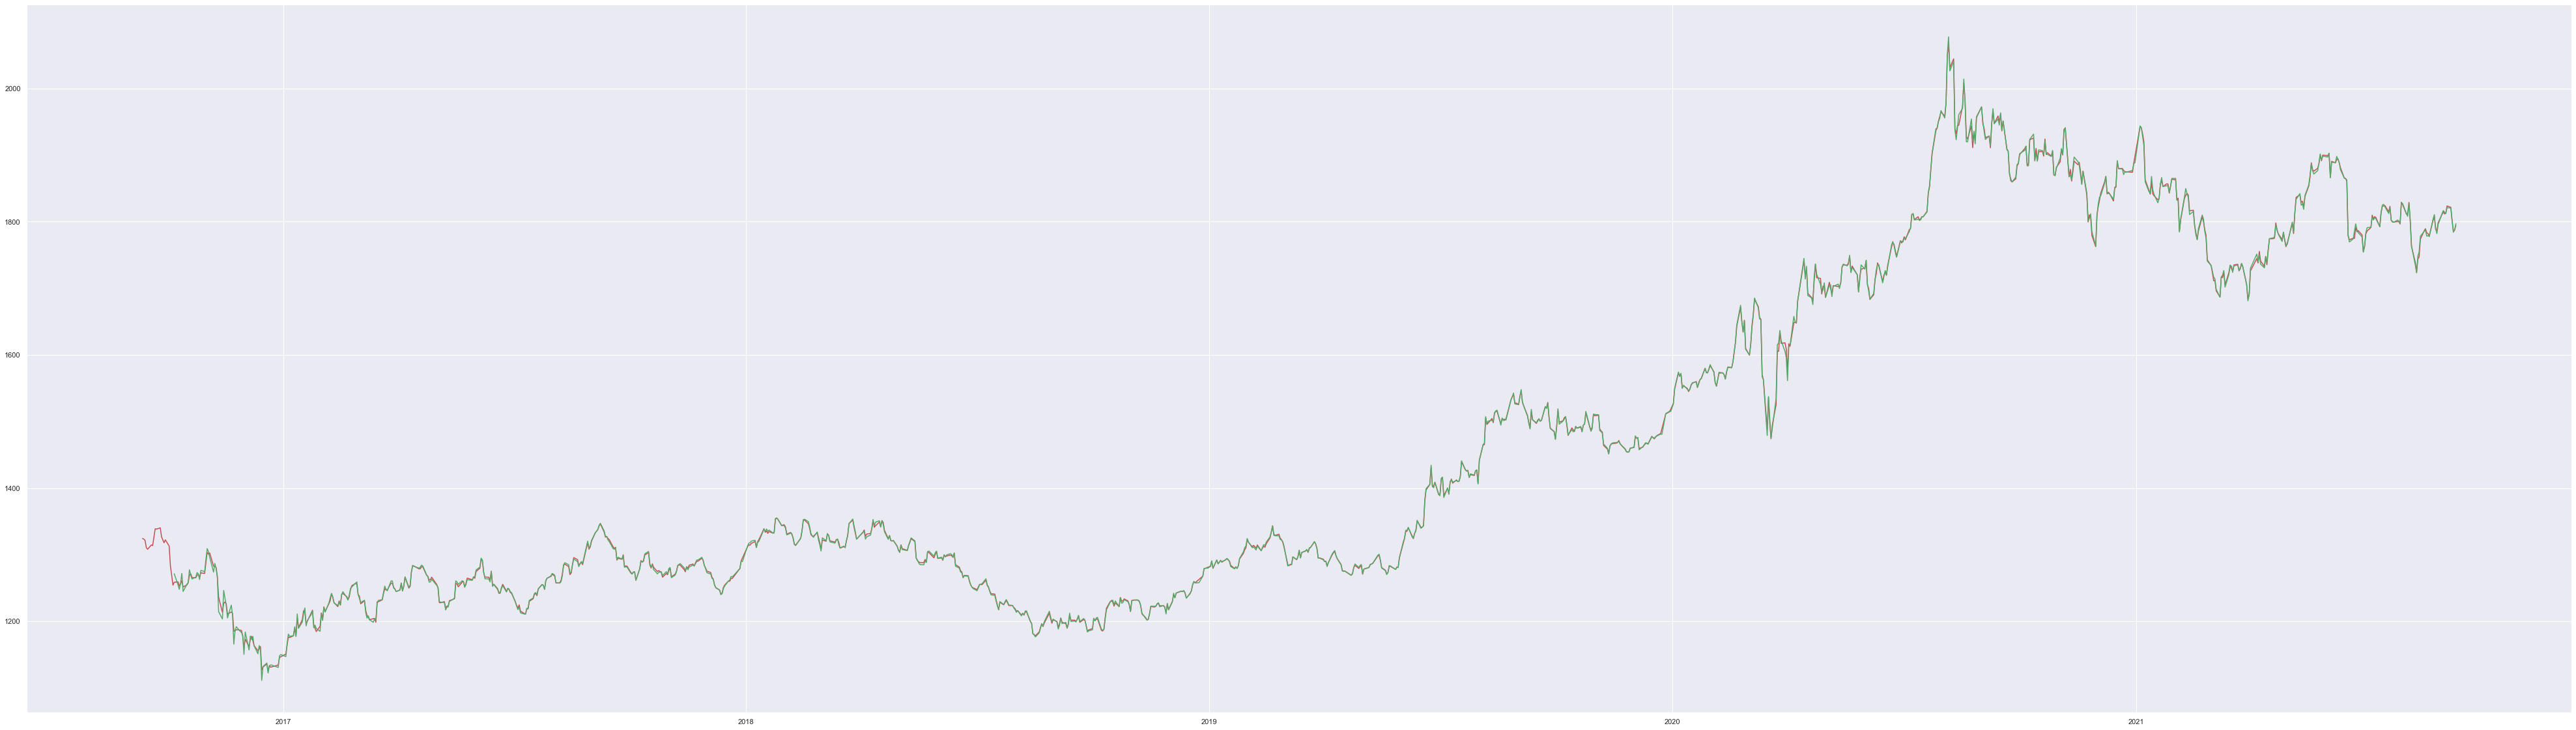

In [3]:
plt.plot(gold_original.Date, gold_original.gold,
         'r-', gold_preview.Date, gold_preview.Value, 'g-')


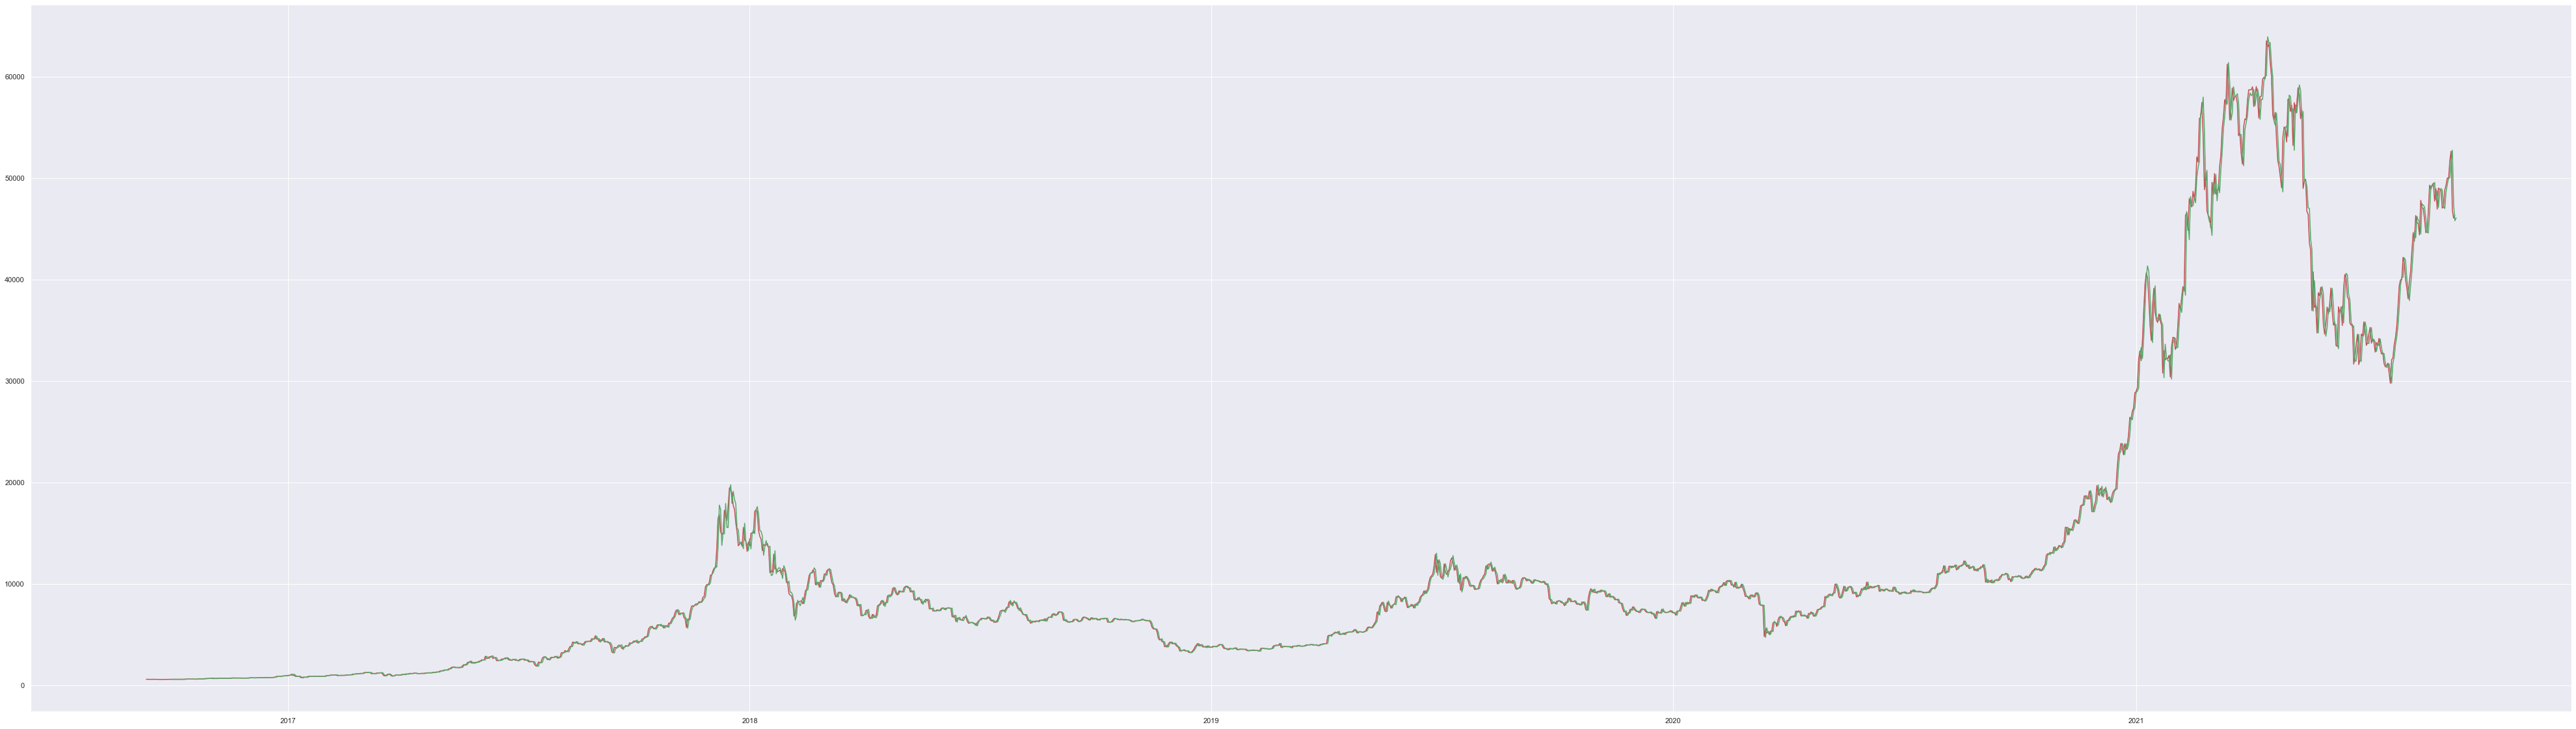

In [4]:
plt.plot(bitcoin_original.Date, bitcoin_original.bitcoin,
         'r-', bitcoin_preview.Date, bitcoin_preview.Value, 'g-')


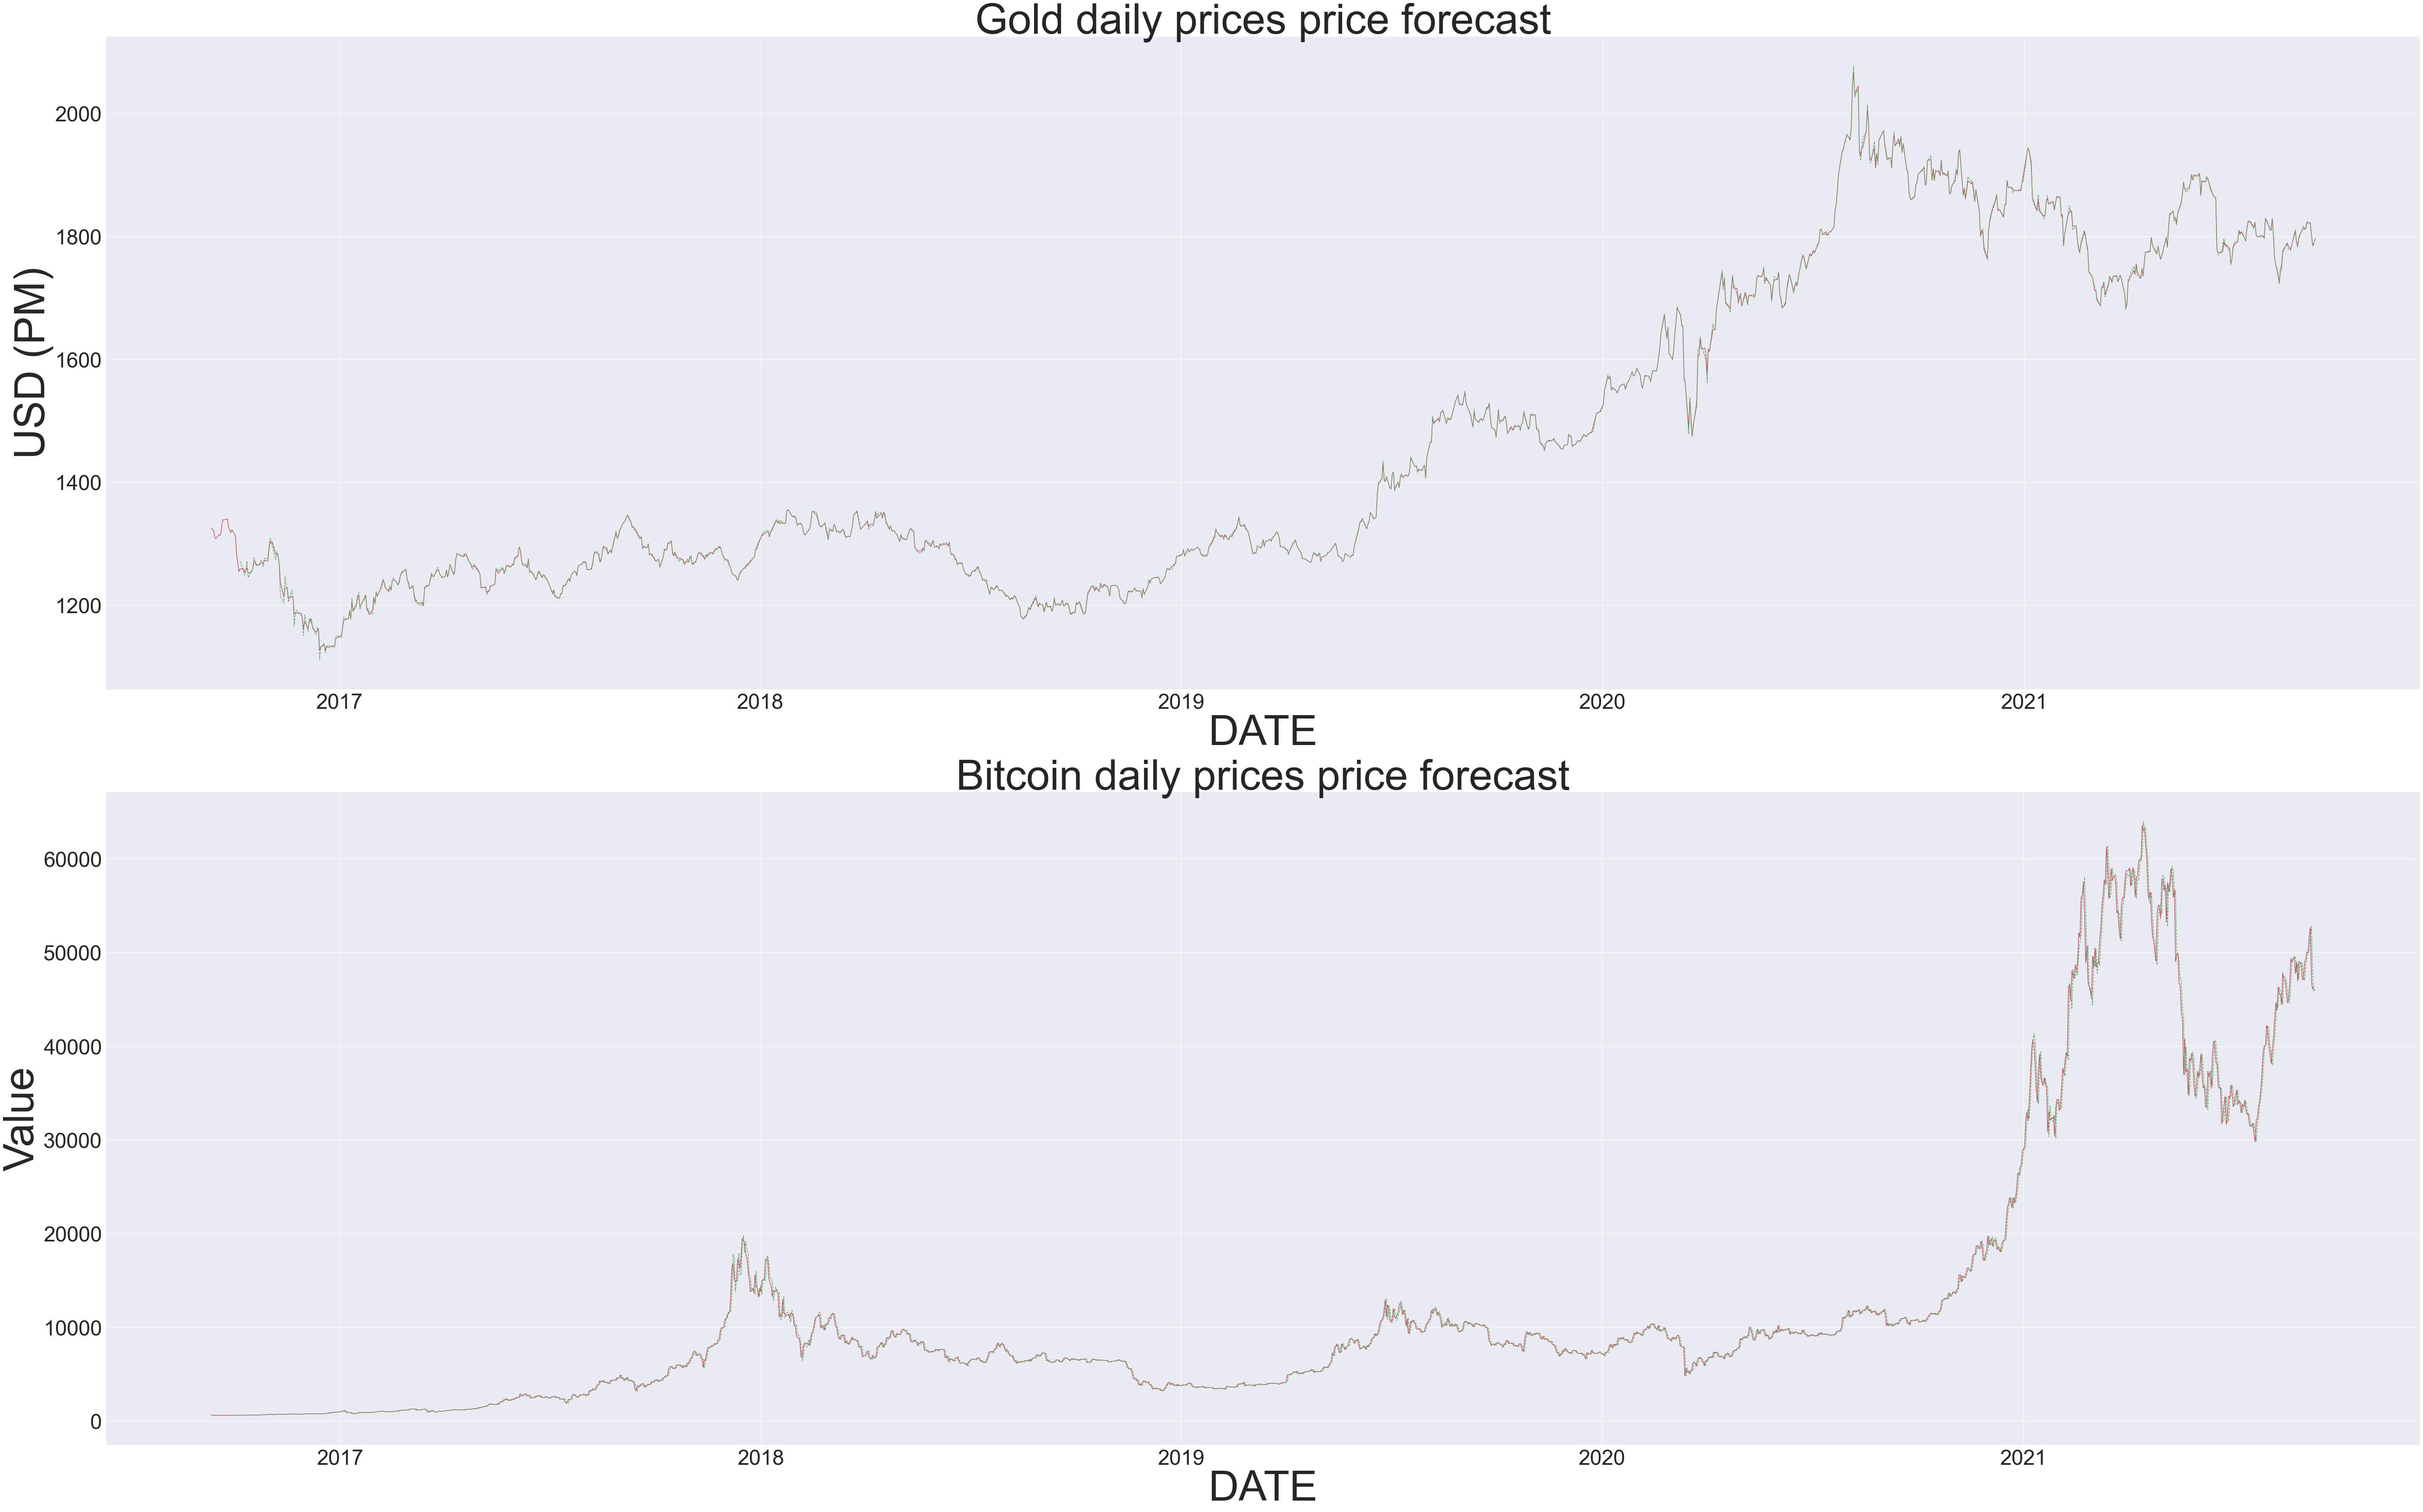

In [5]:
plt.rcParams['figure.figsize'] = (80, 50)  # 设置输出图片大小
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
p1 = plt.subplot(211)
plt.plot(gold_original.Date, gold_original.gold,
         'r-', gold_preview.Date, gold_preview.Value, 'g--')
p1.set_xlabel('DATE',fontsize=100)
p1.set_ylabel('USD (PM)',fontsize=100)
p1.set_title('Gold daily prices price forecast',fontsize=100)
plt.xticks(size=50)
plt.yticks(size=50)
p2=plt.subplot(212)
plt.plot(bitcoin_original.Date, bitcoin_original.bitcoin,
         'r-', bitcoin_preview.Date, bitcoin_preview.Value, 'g--')
p2.set_xlabel('DATE',fontsize=100)
p2.set_ylabel('Value',fontsize=100)
p2.set_title('Bitcoin daily prices price forecast',fontsize=100)
plt.xticks(size=50)
plt.yticks(size=50)
plt.tight_layout()
plt.savefig('../img/combination.png')
plt.show()



        id       Date  bitcoin
1205  1205 2019-12-30  7385.36
1206  1206 2019-12-31  7219.60
1207  1207 2020-01-01  7168.31
1208  1208 2020-01-02  7175.68
1209  1209 2020-01-03  6944.33
1210  1210 2020-01-04  7326.35
1211  1211 2020-01-05  7347.89
1212  1212 2020-01-06  7351.57
1213  1213 2020-01-07  7759.24
1214  1214 2020-01-08  8165.47
1215  1215 2020-01-09  8042.65
1216  1216 2020-01-10  7817.92
      Unnamed: 0       Date        Value
1185        1185 2019-12-30  7279.433440
1186        1186 2019-12-31  7380.005003
1187        1187 2020-01-01  7225.051448
1188        1188 2020-01-02  7174.547970
1189        1189 2020-01-03  7173.931565
1190        1190 2020-01-04  6926.452198
1191        1191 2020-01-05  7351.302143
1192        1192 2020-01-06  7358.312291
1193        1193 2020-01-07  7332.805758
1194        1194 2020-01-08  7770.028947
1195        1195 2020-01-09  8194.060053
1196        1196 2020-01-10  8021.285653


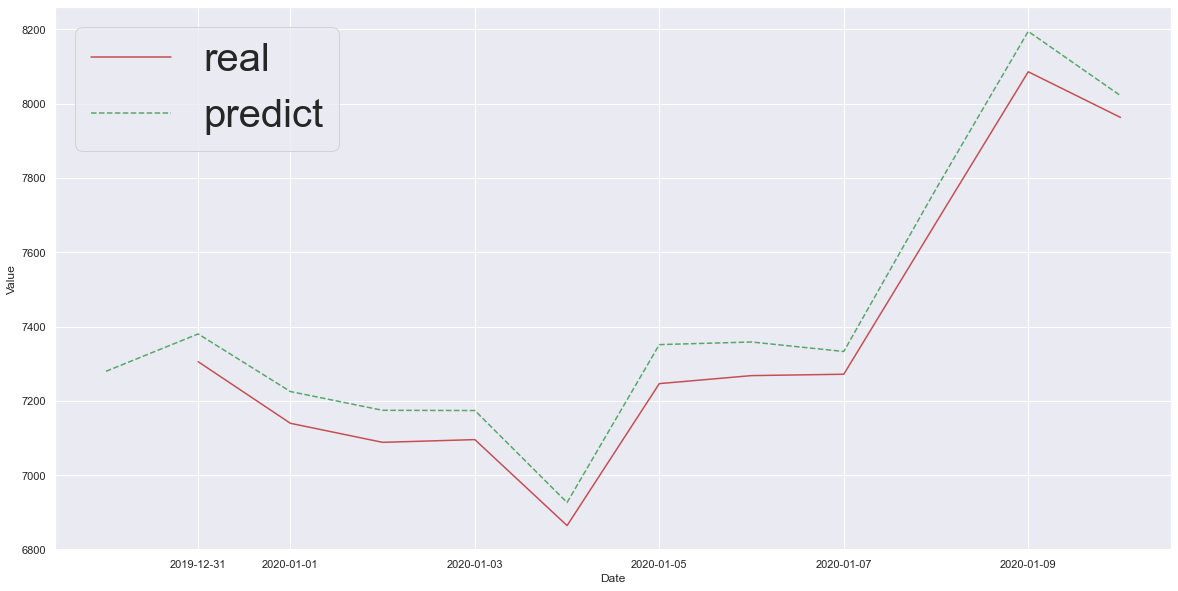

In [11]:
print(bitcoin_original.loc[1205:1216])
print(bitcoin_preview.loc[1185:1196])
plt.rcParams['figure.figsize'] = (20, 10)
l1 = plt.plot(bitcoin_original.loc[1205:1216].Date,
         bitcoin_original.loc[1205:1216].bitcoin.shift()-80, 'r-',label='real')
l2 = plt.plot(bitcoin_preview.loc[1185:1196].Date,
              bitcoin_preview.loc[1185:1196].Value, 'g--', label='predict')

plt.legend(loc='upper left',fontsize=40)

plt.xlabel('Date')
plt.ylabel('Value')
plt.savefig('../img/detail_bitcoin.png')
plt.show()


      Unnamed: 0       Date     gold
1080        1090 2021-01-04  1943.20
1081        1091 2021-01-05  1940.35
1082        1092 2021-01-06  1931.95
1083        1093 2021-01-07  1920.10
1084        1094 2021-01-08  1862.90
      Unnamed: 0       Date        Value
1071        1071 2021-01-04  1943.763610
1072        1072 2021-01-05  1941.115132
1073        1073 2021-01-06  1927.546803
1074        1074 2021-01-07  1914.454537
1075        1075 2021-01-08  1860.049186


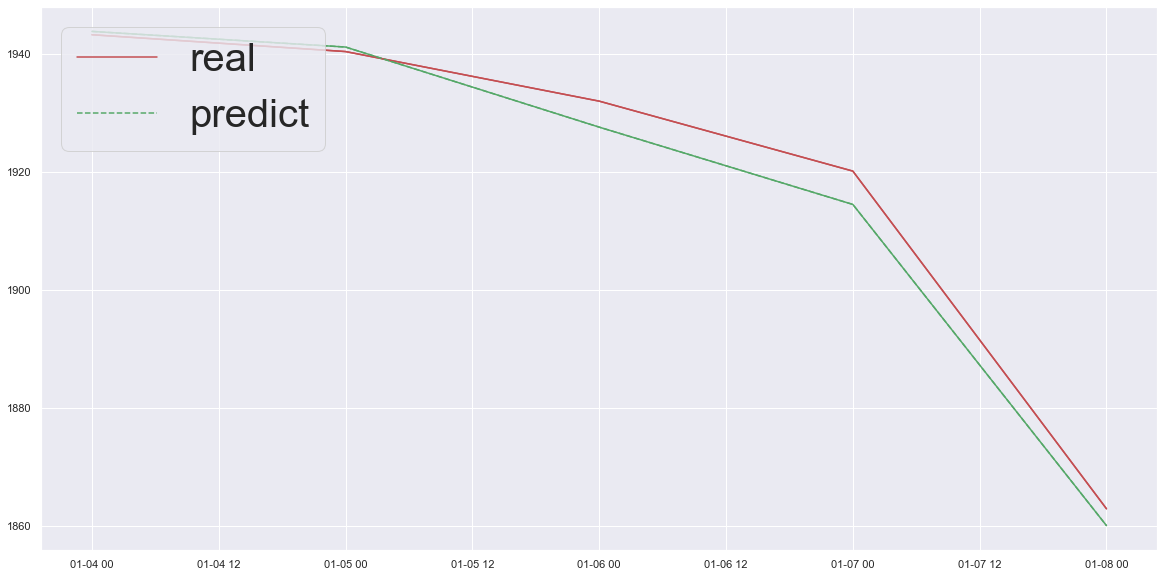

In [ ]:
print(gold_original.loc[1080:1084])
print(gold_preview.loc[1071:1075])
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(gold_original.loc[1080:1084].Date,
         gold_original.loc[1080:1084].gold, 'r-', gold_preview.loc[1071:1075].Date, gold_preview.loc[1071:1075].Value, 'g-')

l1 = plt.plot(gold_original.loc[1080:1084].Date,
         gold_original.loc[1080:1084].gold, 'r-', label='real')
l2 = plt.plot(gold_preview.loc[1071:1075].Date,
              gold_preview.loc[1071:1075].Value,  'g--', label='predict')

plt.legend(loc='upper left',fontsize=40)
plt.savefig('../img/detail_gold.png')
